<a href="https://colab.research.google.com/github/khosravisina/Pong-Game/blob/main/Nav1.5%20drug%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas requests mols2grid useful-rdkit-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 97.9 MB/s eta 0:00:00


In [2]:
! pip install scaffold_finder

ERROR: Could not find a version that satisfies the requirement scaffold_finder (from versions: none)
ERROR: No matching distribution found for scaffold_finder


In [3]:
import requests
lib_file = requests.get("https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/sar_analysis/scaffold_finder.py")
ofs = open("scaffold_finder.py","w")
print(lib_file.text,file=ofs)
ofs.close()

In [69]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdDepictor import Compute2DCoords
from io import StringIO
import mols2grid
from scaffold_finder import generate_fragments, find_scaffolds, get_molecules_with_scaffold, cleanup_fragment
import useful_rdkit_utils as uru


In [6]:
df = pd.read_csv('/content/data_ready_to_fingerprint.csv')

In [7]:
df.head()

id                                             smiles      IC50  \
0  CHEMBL3350235  CSc1ccc([C@@H]2N=C(OCc3ccc(NS(C)(=O)=O)cc3)N(C...   30000.0   
1      CHEMBL473  CN(CCOc1ccc(NS(C)(=O)=O)cc1)CCc1ccc(NS(C)(=O)=...  300000.0   
2   CHEMBL432963                      CCCC/N=C(/N)NC(=O)c1ccc(C)cc1    9000.0   
3   CHEMBL109012             N=C(NCCCCc1ccccc1)NC(=O)c1cccc(Cl)c1Cl    2710.0   
4   CHEMBL108347            CCCCOc1ccc(C(=O)NC(=N)NCCCCc2ccccc2)cc1     560.0   

      pIC50         class  
0  4.522879      inactive  
1  3.522879      inactive  
2  5.045757      inactive  
3  5.567031      inactive  
4  6.251812  intermediate

In [12]:
df_1 = df[(df['class'] == 'potent') | (df['class'] == 'active')]

In [13]:
df_1.head()

id                                             smiles  IC50  \
20   CHEMBL2012273  Fc1c(Cn2ccc3c(OC4CCN(Cc5cscn5)CC4)ncnc32)cccc1...  40.0   
22   CHEMBL2012285       Cc1nc(CN2CCC(Oc3ncnc4c3ccn4Cc3ccccc3)CC2)cs1  80.0   
23   CHEMBL2012300  Fc1c(Cl)cccc1Cn1ccc2c(OC3CCN(Cc4ccccn4)CC3)ncnc21  80.0   
197  CHEMBL4102624     O=C1CCCC(CNc2cc(F)c(S(=O)(=O)Nc3nccs3)cc2Cl)C1  52.0   
269  CHEMBL2012179     Cc1cn(Cc2ccccc2)c2ncnc(OC3CCN(Cc4cscn4)CC3)c12  50.0   

        pIC50   class  
20   7.397940  active  
22   7.096910  active  
23   7.096910  active  
197  7.283997  active  
269  7.301030  active

In [16]:
df_1['mol'] = df_1['smiles'].apply(Chem.MolFromSmiles)

<ipython-input-16-2b7d464e600a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['mol'] = df_1['smiles'].apply(Chem.MolFromSmiles)


In [17]:
df_1.head()

id                                             smiles  IC50  \
20   CHEMBL2012273  Fc1c(Cn2ccc3c(OC4CCN(Cc5cscn5)CC4)ncnc32)cccc1...  40.0   
22   CHEMBL2012285       Cc1nc(CN2CCC(Oc3ncnc4c3ccn4Cc3ccccc3)CC2)cs1  80.0   
23   CHEMBL2012300  Fc1c(Cl)cccc1Cn1ccc2c(OC3CCN(Cc4ccccn4)CC3)ncnc21  80.0   
197  CHEMBL4102624     O=C1CCCC(CNc2cc(F)c(S(=O)(=O)Nc3nccs3)cc2Cl)C1  52.0   
269  CHEMBL2012179     Cc1cn(Cc2ccccc2)c2ncnc(OC3CCN(Cc4cscn4)CC3)c12  50.0   

        pIC50   class                                               mol  
20   7.397940  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87ca0>  
22   7.096910  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87a70>  
23   7.096910  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87a00>  
197  7.283997  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87b50>  
269  7.301030  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87d10>

In [32]:
df_1 = df_1.rename(columns = {'SNILES':'SMILES', 'id':'Name'})

In [33]:
df_1

Name                                             SMILES  IC50  \
20    CHEMBL2012273  Fc1c(Cn2ccc3c(OC4CCN(Cc5cscn5)CC4)ncnc32)cccc1...  40.0   
22    CHEMBL2012285       Cc1nc(CN2CCC(Oc3ncnc4c3ccn4Cc3ccccc3)CC2)cs1  80.0   
23    CHEMBL2012300  Fc1c(Cl)cccc1Cn1ccc2c(OC3CCN(Cc4ccccn4)CC3)ncnc21  80.0   
197   CHEMBL4102624     O=C1CCCC(CNc2cc(F)c(S(=O)(=O)Nc3nccs3)cc2Cl)C1  52.0   
269   CHEMBL2012179     Cc1cn(Cc2ccccc2)c2ncnc(OC3CCN(Cc4cscn4)CC3)c12  50.0   
...             ...                                                ...   ...   
3100         739014  CCCCCCN(CCCN[C@@H](Cc1ccc(CCCCNC(=N)NC(=O)c2nc...   8.8   
3101         739015  N=C(NCCCCc1ccc2cc(C[C@H](NCCCN(C[C@H](O)[C@@H]...  27.4   
3102         739016  CCCCCCN(CCCN[C@@H](Cc1ccc2cc(CCCCNC(=N)NC(=O)c...  11.3   
3103         739017  N=C(NCCCCc1ccc(C[C@H](NCCCN(C[C@H](O)[C@@H](O)...   5.5   
3104         739018  CCCCCCN(CCCN[C@@H](Cc1ccc(CCCCNC(=N)NC(=O)c2nc...   8.4   

         pIC50   class                                               mol  
20    7.397940  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87ca0>  
22    7.096910  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87a70>  
23    7.096910  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87a00>  
197   7.283997  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87b50>  
269   7.301030  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87d10>  
...        ...     ...                                               ...  
3100  8.055517  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca35a0>  
3101  7.562249  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca3610>  
3102  7.946922  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca3680>  
3103  8.259637  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca36f0>  
3104  8.075721  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca3760>  

[571 rows x 6 columns]

In [34]:
mol_df, scaffold_df = find_scaffolds(df_1)

  0%|          | 0/571 [00:00<?, ?it/s]

In [39]:
scaffold_df['mol'] = scaffold_df.Scaffold.apply(Chem.MolFromSmiles)

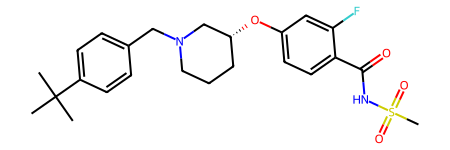

In [45]:
scaffold_df['mol'][5]

In [50]:
scaffold_df.sort_values(by='Count', ascending=False).head(15)

Scaffold  Count  NumAtoms  \
14415       O=C(N[SH](=O)=O)c1cc(C2CC2)c(OCC2CCNCC2)cc1F    151        24   
6243         CS(=O)(=O)NC(=O)c1ccc(OCC2CCNCC2)c(C2CC2)c1    144        24   
4872        CS(=O)(=O)NC(=O)c1cc(C2CC2)c(OCC2CCNCC2)cc1F    144        25   
3280     CN1CCC(COc2cc(F)c(C(=O)NS(C)(=O)=O)cc2C2CC2)CC1    143        26   
3282     CN1CCC(COc2cc(F)c(C(=O)N[SH](=O)=O)cc2C2CC2)CC1    135        25   
15432        O=C(N[SH](=O)=O)c1ccc(OCC2CCNCC2)c(C2CC2)c1    115        23   
3296        CN1CCC(COc2ccc(C(=O)NS(C)(=O)=O)cc2C2CC2)CC1    107        25   
4766   CS(=O)(=O)NC(=O)c1cc(C2CC2)c(OCC2CCN(Cc3ccccc3...     96        32   
3294          CN1CCC(COc2ccc(C(=O)NS(C)(=O)=O)c(F)c2)CC1     90        23   
4759   CS(=O)(=O)NC(=O)c1cc(C2CC2)c(OCC2CCN(Cc3cccc(C...     79        33   
10586        Fc1ccc(C2CC2)c(OCC2CCN(Cc3cccc(Cl)c3)CC2)c1     77        26   
2114    CCN1CCC(COc2cc(F)c(C(=O)N[SH](=O)=O)cc2C2CC2)CC1     74        26   
2111    CCN1CCC(COc2cc(F)c(C(=O)NS(C)(=O)=O)cc2C2CC2)CC1     72        27   
14664   O=C(N[SH](=O)=O)c1cc(C2CC2)c(O[C@@H]2CCCNC2)cc1F     72        23   
14307  O=C(N[SH](=O)=O)c1cc(C2CC2)c(OCC2CCN(Cc3cccc(C...     70        32   

                                                    mol  
14415  <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b300>  
6243   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b4c0>  
4872   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b530>  
3280   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b6f0>  
3282   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b3e0>  
15432  <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b760>  
3296   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b680>  
4766   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b370>  
3294   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b450>  
4759   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b5a0>  
10586  <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b610>  
2114   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b7d0>  
2111   <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b840>  
14664  <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b8b0>  
14307  <rdkit.Chem.rdchem.Mol object at 0x79cbcea7b990>

In [54]:
scaffold_0 = scaffold_df.Scaffold.values[0]

In [55]:
scaffold_0

'O=C(N[SH](=O)=O)c1cc(C2CC2)c(OCC2CCNCC2)cc1F'

In [56]:
scaffold_smiles_list, chembl208_mol_df = get_molecules_with_scaffold(scaffold_0, mol_df, df_1)

In [60]:
mol_scaffold = Chem.MolFromSmiles(scaffold_smiles_list[0])

In [61]:
mols2grid.display(scaffold_df,smiles_col="Scaffold",subset=["img","Count","NumAtoms"])

MolGridWidget()

In [64]:
mols2grid.display(df_1,smiles_col="SMILES",subset=["IC50","class"])

MolGridWidget()

In [65]:
df_1.head()

Name                                             SMILES  IC50  \
20   CHEMBL2012273  Fc1c(Cn2ccc3c(OC4CCN(Cc5cscn5)CC4)ncnc32)cccc1...  40.0   
22   CHEMBL2012285       Cc1nc(CN2CCC(Oc3ncnc4c3ccn4Cc3ccccc3)CC2)cs1  80.0   
23   CHEMBL2012300  Fc1c(Cl)cccc1Cn1ccc2c(OC3CCN(Cc4ccccn4)CC3)ncnc21  80.0   
197  CHEMBL4102624     O=C1CCCC(CNc2cc(F)c(S(=O)(=O)Nc3nccs3)cc2Cl)C1  52.0   
269  CHEMBL2012179     Cc1cn(Cc2ccccc2)c2ncnc(OC3CCN(Cc4cscn4)CC3)c12  50.0   

        pIC50   class                                               mol  
20   7.397940  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87ca0>  
22   7.096910  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87a70>  
23   7.096910  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87a00>  
197  7.283997  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87b50>  
269  7.301030  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfc87d10>

In [71]:
df_1['fp'] = df_1.mol.apply(uru.mol2morgan_fp)

In [72]:
df_1['cluster'] = uru.taylor_butina_clustering(df_1.fp.values)

In [73]:
df_1['cluster'].value_counts()

0     122
1      60
4      34
6      29
13     28
     ... 
67      1
66      1
39      1
65      1
12      1
Name: cluster, Length: 72, dtype: int64

In [76]:
mols2grid.display(df_1.query("cluster == 0"),mol_col="mol",subset=["img"])

MolGridWidget()

In [77]:
scaffols_0

'O=C(N[SH](=O)=O)c1cc(C2CC2)c(OCC2CCNCC2)cc1F'

In [86]:
mb="""
  MJ231300

 27 29  0  0  0  0  0  0  0  0999 V2000
   -0.2727    2.3717    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9872    2.7842    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9872    3.6092    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2727    4.0217    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    0.4417    4.4342    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6852    4.7361    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.1397    3.3072    0.0000 R#   0  0  0  0  0  0  0  0  0  3  0  0
   -1.7016    2.3717    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7016    1.5467    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4161    1.1342    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4161    0.3092    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0036   -0.4052    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8286   -0.4052    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1306    1.5467    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8450    1.1342    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5595    1.5467    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2740    1.1342    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.5561    1.9094    0.0000 R#   0  0  0  0  0  0  0  0  0  2  0  0
   -4.7436    0.5022    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.0259   -0.2730    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.8383   -0.4163    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -6.1205   -1.1915    0.0000 R#   0  0  0  0  0  0  0  0  0  1  0  0
   -6.3686    0.2156    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0864    0.9909    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1306    2.3717    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4161    2.7842    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4161    3.6092    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  4  6  2  0  0  0  0
  4  7  1  0  0  0  0
  2  8  1  0  0  0  0
  8  9  4  0  0  0  0
  9 10  4  0  0  0  0
 10 11  1  0  0  0  0
 11 12  1  0  0  0  0
 12 13  1  0  0  0  0
 11 13  1  0  0  0  0
 10 14  4  0  0  0  0
 14 15  1  0  0  0  0
 15 16  1  0  0  0  0
 16 17  1  0  0  0  0
 17 18  1  0  0  0  0
 17 19  1  0  0  0  0
 19 20  1  0  0  0  0
 20 21  1  0  0  0  0
 21 22  1  0  0  0  0
 21 23  1  0  0  0  0
 23 24  1  0  0  0  0
 17 24  1  0  0  0  0
 14 25  4  0  0  0  0
 25 26  4  0  0  0  0
  8 26  4  0  0  0  0
 26 27  1  0  0  0  0
M  END
"""

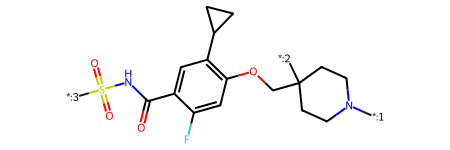

In [89]:
mol_scaffold


In [90]:
rgd,failed = Chem.rdRGroupDecomposition.RGroupDecompose([mol_scaffold],df_1.mol.values,asRows=False)

[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[16:48:36] No core matches
[

In [93]:
len(failed)

337

In [101]:
df_1 = df_1.reset_index()

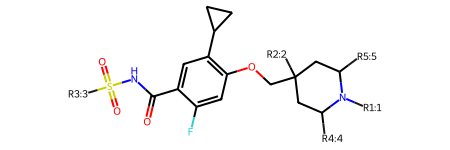

In [96]:
rgd['Core'][0]

In [102]:
df_2 = df_1.drop(failed,axis=0)

In [104]:
df_2.head()

index    Name                                             SMILES  IC50  \
76    1962  455949  O=C(NS(=O)(=O)N1CCC1)c1cc(C2CC2)c(OCC2CC3CCC(C...  25.0   
77    1964  455951  O=C(NS(=O)(=O)N1CCC1)c1cc(C2CC2)c(OCC2CC3CCC(C...   4.3   
100   1991  455982  CS(=O)(=O)NC(=O)c1cc(C2CC2)c(OCC2CCN(c3ccccc3)...   9.9   
104   1999  455991  CS(=O)(=O)NC(=O)c1cc(C2CC2)c(OCC2CCN(Cc3cccc(F...  93.0   
105   2000  455992  CC(c1cc(F)cc(F)c1)N1CCC(COc2cc(F)c(C(=O)NS(C)(...  22.0   

        pIC50   class                                               mol  \
76   7.602060  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca9d90>   
77   8.366532  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca9e00>   
100  8.004365  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfcaa810>   
104  7.031517  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfcaa9d0>   
105  7.657577  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfcaaa40>   

                                                    fp  cluster  
76   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       39  
77   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       35  
100  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0  
104  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0  
105  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0

In [105]:
r_groups = [x for x in rgd.keys() if x != "Core"]
r_groups

['R1', 'R2', 'R3', 'R4', 'R5']

In [108]:
for r in sorted(r_groups):
    df_2[r] = rgd[r]
    df_2[r] = df_2[r].apply(Chem.MolToSmiles)

In [109]:
df_2

index    Name                                             SMILES  IC50  \
76    1962  455949  O=C(NS(=O)(=O)N1CCC1)c1cc(C2CC2)c(OCC2CC3CCC(C...  25.0   
77    1964  455951  O=C(NS(=O)(=O)N1CCC1)c1cc(C2CC2)c(OCC2CC3CCC(C...   4.3   
100   1991  455982  CS(=O)(=O)NC(=O)c1cc(C2CC2)c(OCC2CCN(c3ccccc3)...   9.9   
104   1999  455991  CS(=O)(=O)NC(=O)c1cc(C2CC2)c(OCC2CCN(Cc3cccc(F...  93.0   
105   2000  455992  CC(c1cc(F)cc(F)c1)N1CCC(COc2cc(F)c(C(=O)NS(C)(...  22.0   
..     ...     ...                                                ...   ...   
528   2669  499433  [C-]#[N+]c1cc(Cl)cc(CN2CCC(COc3cc(F)c(C(=O)NS(...  26.0   
529   2671  499435  CS(=O)(=O)NC(=O)c1cc(C2CC2)c(OCC2CCN(Cc3cccc(C...   5.4   
530   2673  498832  C[C@H](c1cc(Cl)cc(Cl)c1)N1CCC(COc2cc(F)c(C(=O)...   2.6   
536   2679  499179  C[C@@H](c1cc(Cl)cc(Cl)c1)N1CCC(F)(COc2cc(F)c(C...   4.0   
537   2680  499180  C[C@@H](c1cc(Cl)cc(Cl)c1)N1CCC(F)(COc2cc(F)c(C...   4.5   

        pIC50   class                                               mol  \
76   7.602060  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca9d90>   
77   8.366532  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca9e00>   
100  8.004365  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfcaa810>   
104  7.031517  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfcaa9d0>   
105  7.657577  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfcaaa40>   
..        ...     ...                                               ...   
528  7.585027  active  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca2500>   
529  8.267606  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca2570>   
530  8.585027  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca25e0>   
536  8.397940  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca2880>   
537  8.346787  potent  <rdkit.Chem.rdchem.Mol object at 0x79cbcfca28f0>   

                                                    fp  cluster  \
76   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       39   
77   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       35   
100  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0   
104  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0   
105  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0   
..                                                 ...      ...   
528  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0   
529  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        3   
530  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0   
536  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...        4   
537  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...        4   

                                 R1        R2             R3              R4  \
76                 Clc1ccccc1C[*:1]  [H][*:2]  C1CN([*:3])C1  C(C[*:5])[*:4]   
77       c1ccc(C(c2ccccc2)[*:1])cc1  [H][*:2]  C1CN([*:3])C1  C(C[*:5])[*:4]   
100                 c1ccc([*:1])cc1  [H][*:2]         C[*:3]        [H][*:4]   
104               Fc1cccc(C[*:1])c1  [H][*:2]         C[*:3]        [H][*:4]   
105         CC(c1cc(F)cc(F)c1)[*:1]  [H][*:2]         C[*:3]        [H][*:4]   
..                              ...       ...            ...             ...   
528   [C-]#[N+]c1cc(Cl)cc(C[*:1])c1  [H][*:2]         C[*:3]        [H][*:4]   
529        FC(F)(F)c1cccc(C[*:1])n1  [H][*:2]         C[*:3]        [H][*:4]   
530   C[C@H](c1cc(Cl)cc(Cl)c1)[*:1]  [H][*:2]     C1CC1[*:3]        [H][*:4]   
536  C[C@@H](c1cc(Cl)cc(Cl)c1)[*:1]    F[*:2]         C[*:3]        [H][*:4]   
537  C[C@@H](c1cc(Cl)cc(Cl)c1)[*:1]    F[*:2]     C1CC1[*:3]        [H][*:4]   

                 R5  
76   C(C[*:5])[*:4]  
77   C(C[*:5])[*:4]  
100        [H][*:5]  
104        [H][*:5]  
105        [H][*:5]  
..              ...  
528        [H][*:5]  
529        [H][*:5]  
530        [H][*:5]  
536        [H][*:5]  
537        [H][*:5]  

[234 rows x 14 columns]

In [115]:
from ipywidgets import interact
@interact(rg=r_groups)
def display_rgroups(rg):
    vc_df = uru.value_counts_df(df_2,rg)
    return mols2grid.display(vc_df,smiles_col=rg,subset=["img","count"])

interactive(children=(Dropdown(description='rg', options=('R1', 'R2', 'R3', 'R4', 'R5'), value='R1'), Output()…